<a href="https://colab.research.google.com/github/Felipepa9/MADSI/blob/main/ENTREGA_3_%7C%7C_NO_SUPERVISADO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importar el dataset
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/CIENCIA DE DATOS/marketing_campaign.csv', sep='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
data.dropna(subset=['Income'], inplace=True)

In [7]:
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [8]:
#Eliminar
data['ID'].unique()
data.drop(columns=['ID'], inplace=True)
data.drop(columns=['Dt_Customer'], inplace=True)

In [9]:
# Calcular la edad de cada usuario y eliminar la columna Year_Birth
data['Age'] = 2024 - data['Year_Birth']

In [10]:
data.drop(columns=['Year_Birth'], inplace=True)

In [11]:
# Convertirlo en valor númerico
data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [12]:
# Remplazar los valores objeto a numericos
education_dictionary = {'Graduation': 3, 'PhD': 5, 'Master': 4, 'Basic': 2, '2n Cycle': 1}
data['Education'] = data['Education'].map(education_dictionary)

In [13]:
# Convertirlo en valor númerico
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [14]:
Marital_Status_dictionary = {'Single': 1, 'Together': 2, 'Married': 3, 'Divorced': 4, 'Widow': 5,
                        'Alone': 6, 'Absurd': 7, 'YOLO': 8}
data['Marital_Status'] = data['Marital_Status'].map(Marital_Status_dictionary)

In [15]:
data = data[data['Income'] <= 200000]

In [16]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,3,1,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,0,3,11,1,67
1,3,1,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,3,11,0,70
2,3,2,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,3,11,0,59
3,3,2,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,3,11,0,40
4,5,3,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,3,11,0,43


In [17]:
data.describe()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
count,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,...,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.0,2215.0,2215.000000,2215.000000
mean,3.394131,2.502032,51969.861400,0.441535,0.505643,49.024379,305.225282,26.361625,167.063205,37.651016,...,0.073589,0.074041,0.073138,0.064108,0.013544,0.009481,3.0,11.0,0.150339,55.183296
std,1.124363,1.073568,21526.320095,0.536886,0.544198,28.949608,337.345380,39.802036,224.311559,54.760822,...,0.261160,0.261896,0.260421,0.245001,0.115614,0.096929,0.0,0.0,0.357484,11.987000
min,1.000000,1.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,28.000000
25%,3.000000,2.000000,35284.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,47.000000
50%,3.000000,3.000000,51373.000000,0.000000,0.000000,49.000000,175.000000,8.000000,68.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,54.000000
75%,4.000000,3.000000,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.500000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,65.000000
max,5.000000,8.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,131.000000


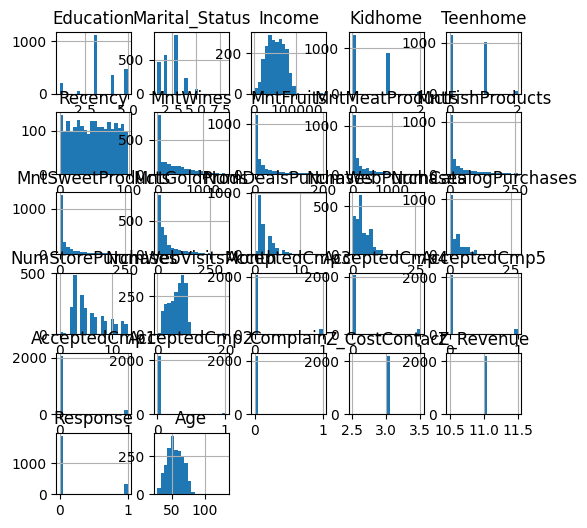

In [18]:
import matplotlib.pyplot as plt
data.hist(bins=20, figsize=(6,6))
plt.show()

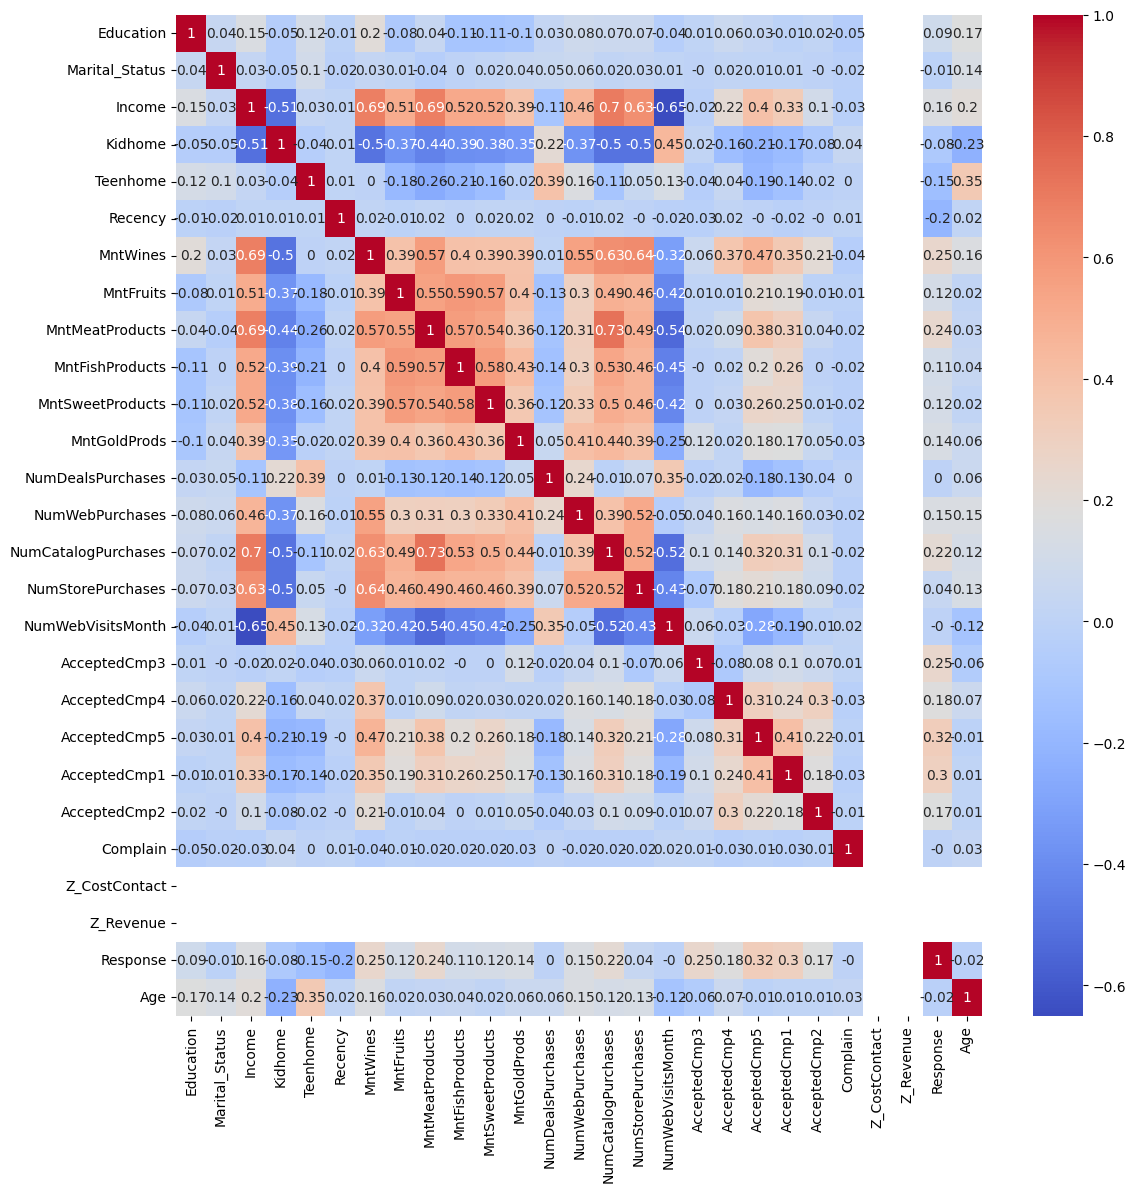

In [19]:
import seaborn as sns

correlation = data.select_dtypes(include=['int64', 'float64']).corr().round(2)

plt.figure(figsize=(13, 13))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2215 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2215 non-null   int64  
 1   Marital_Status       2215 non-null   int64  
 2   Income               2215 non-null   float64
 3   Kidhome              2215 non-null   int64  
 4   Teenhome             2215 non-null   int64  
 5   Recency              2215 non-null   int64  
 6   MntWines             2215 non-null   int64  
 7   MntFruits            2215 non-null   int64  
 8   MntMeatProducts      2215 non-null   int64  
 9   MntFishProducts      2215 non-null   int64  
 10  MntSweetProducts     2215 non-null   int64  
 11  MntGoldProds         2215 non-null   int64  
 12  NumDealsPurchases    2215 non-null   int64  
 13  NumWebPurchases      2215 non-null   int64  
 14  NumCatalogPurchases  2215 non-null   int64  
 15  NumStorePurchases    2215 non-null   int64 

In [21]:
data.drop(columns=['Z_CostContact', 'Z_Revenue', 'Marital_Status', 'Recency', 'Complain', 'Education', 'AcceptedCmp3'], inplace=True)

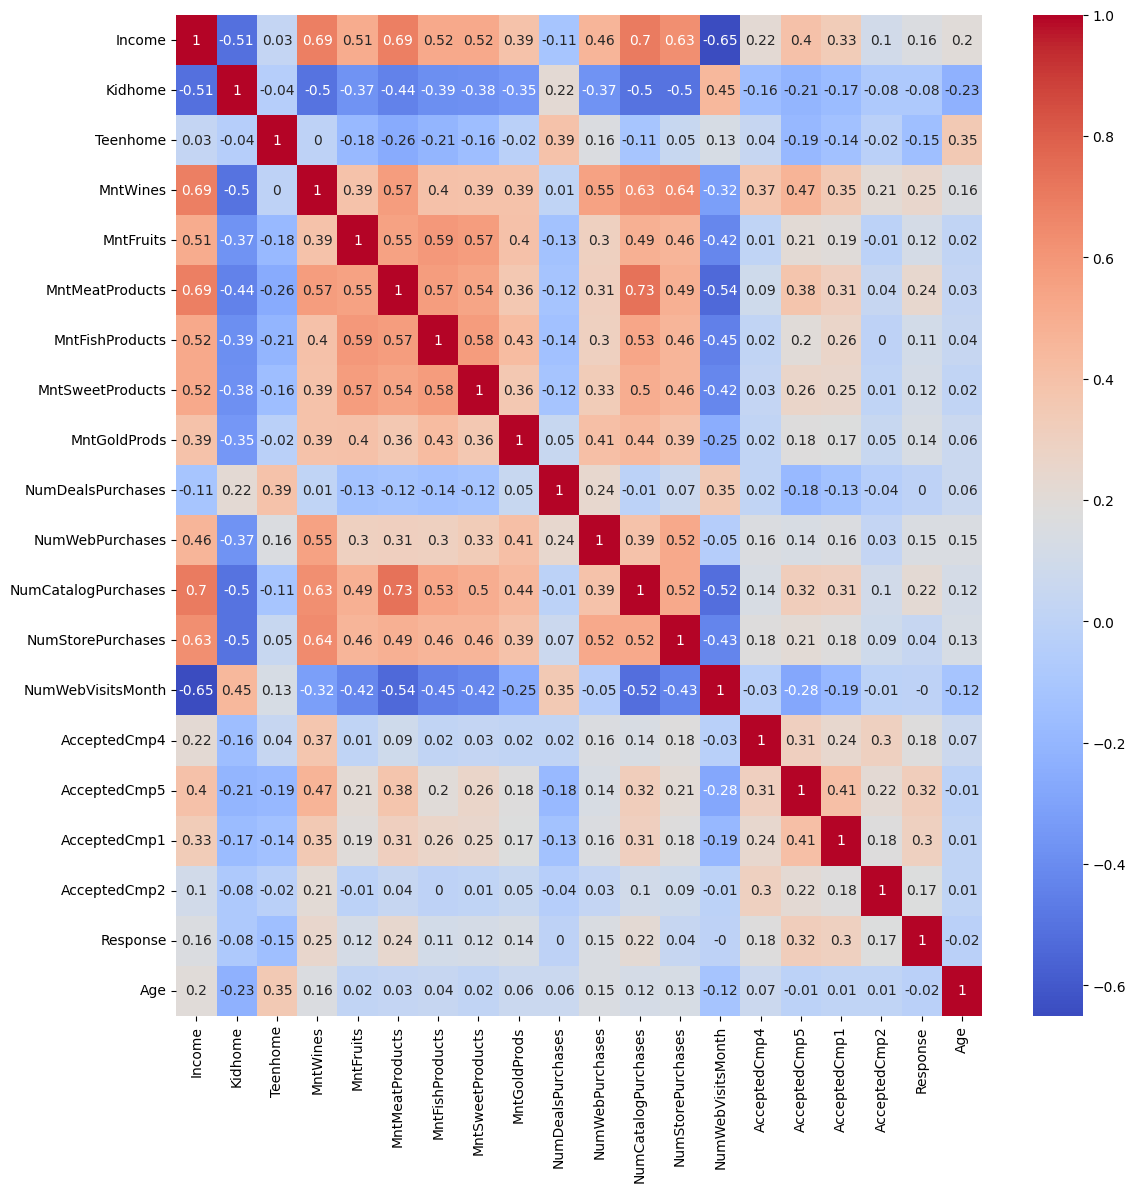

In [22]:
correlation = data.select_dtypes(include=['int64', 'float64']).corr().round(2)

plt.figure(figsize=(13, 13))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [23]:
X_data = data.select_dtypes(include=['int64', 'float64'])
X_data.head()

,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age
0,58138.0,0,0,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,1,67
1,46344.0,1,1,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,70
2,71613.0,0,0,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,59
3,26646.0,1,0,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,40
4,58293.0,1,0,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,43


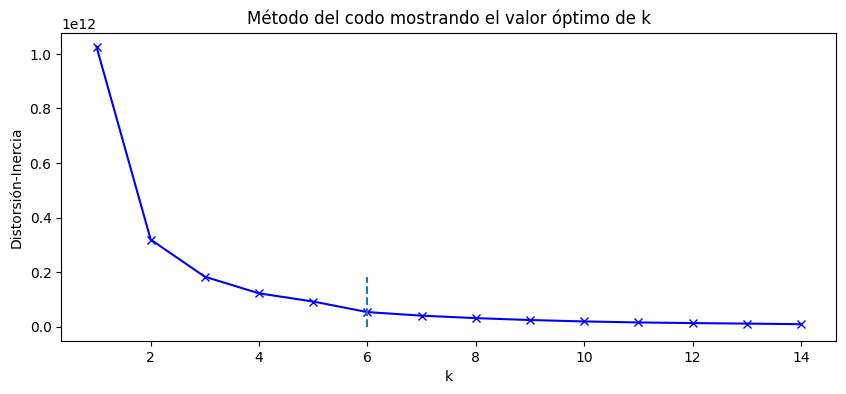

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Asumiendo que 'X_data' es tu DataFrame
# Método del codo - Cada vez que se ejecute este código, el valor de k puede cambiar
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_data)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(10,4))
plt.plot(K, distortions, 'bx-')
plt.vlines(x=K[5], ymin=0, ymax=distortions[2], linestyles='--')
plt.xlabel('k')
plt.ylabel('Distorsión-Inercia')
plt.title('Método del codo mostrando el valor óptimo de k')
plt.show()

In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6)
kmeans.fit(X_data)
kmeans_labels = kmeans.labels_

KM5_Clust = X_data.copy()
KM5_Clust['Cluster'] = kmeans_labels
KM5_Clust.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2215 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2215 non-null   float64
 1   Kidhome              2215 non-null   int64  
 2   Teenhome             2215 non-null   int64  
 3   MntWines             2215 non-null   int64  
 4   MntFruits            2215 non-null   int64  
 5   MntMeatProducts      2215 non-null   int64  
 6   MntFishProducts      2215 non-null   int64  
 7   MntSweetProducts     2215 non-null   int64  
 8   MntGoldProds         2215 non-null   int64  
 9   NumDealsPurchases    2215 non-null   int64  
 10  NumWebPurchases      2215 non-null   int64  
 11  NumCatalogPurchases  2215 non-null   int64  
 12  NumStorePurchases    2215 non-null   int64  
 13  NumWebVisitsMonth    2215 non-null   int64  
 14  AcceptedCmp4         2215 non-null   int64  
 15  AcceptedCmp5         2215 non-null   int64 

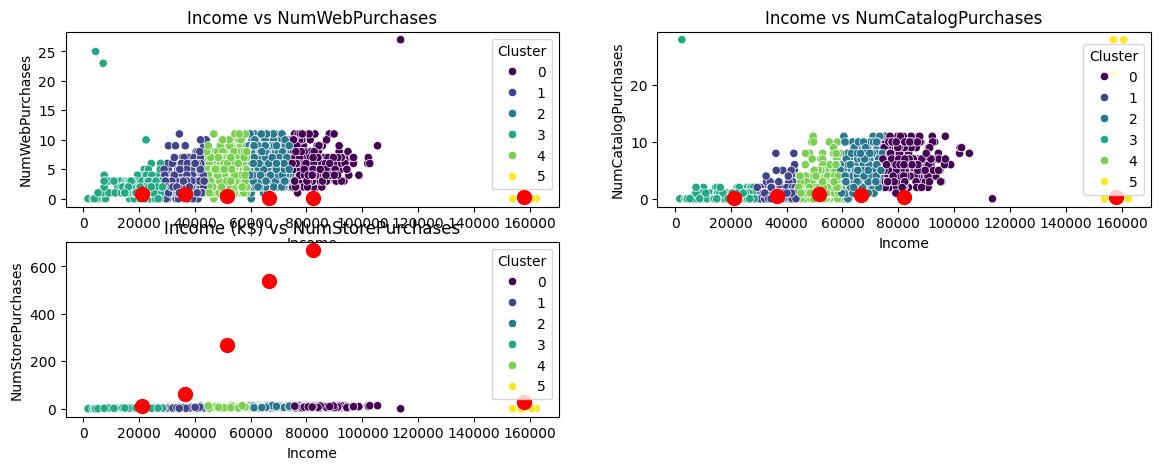

In [35]:
import seaborn as sns

plt.figure(figsize=(14, 5))

# Gráfico de Annual Income vs Spending Score
plt.subplot(2, 2, 1)
sns.scatterplot(x='Income', y='NumWebPurchases', hue='Cluster', data=KM5_Clust, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids') # Change here. Assuming 'Income' is in column 0 and 'NumWebPurchases' is in column 1 of X_data
plt.title('Income vs NumWebPurchases')

# Gráfico de Age vs Spending Score
plt.subplot(2, 2, 2)
sns.scatterplot(x='Income', y='NumCatalogPurchases', hue='Cluster', data=KM5_Clust, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s=100, c='red', label='Centroids')  # Change here. Assuming 'Income' is in column 0 and 'NumCatalogPurchases' is in column 2 of X_data
plt.title('Income vs NumCatalogPurchases')

# Gráfico de Annual Income vs Spending Score
plt.subplot(2, 2, 3)
sns.scatterplot(x='Income', y='NumStorePurchases', hue='Cluster', data=KM5_Clust, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 3], s=100, c='red', label='Centroids')  # Change here. Assuming 'Income' is in column 0 and 'NumStorePurchases' is in column 3 of X_data
plt.title('Income (k$) vs NumStorePurchases')


plt.show()

In [38]:
from sklearn import metrics

# Coeficiente de silueta
silhouette_score = metrics.silhouette_score(X_data, kmeans_labels)
print(f'Silhouette Score: {round(silhouette_score, 3)}')

# Índice de Davies-Bouldin
davies_bouldin_score = metrics.davies_bouldin_score(X_data, kmeans_labels)
print(f'Davies Bouldin Score: {round(davies_bouldin_score, 3)}')

Silhouette Score: 0.539
Davies Bouldin Score: 0.456


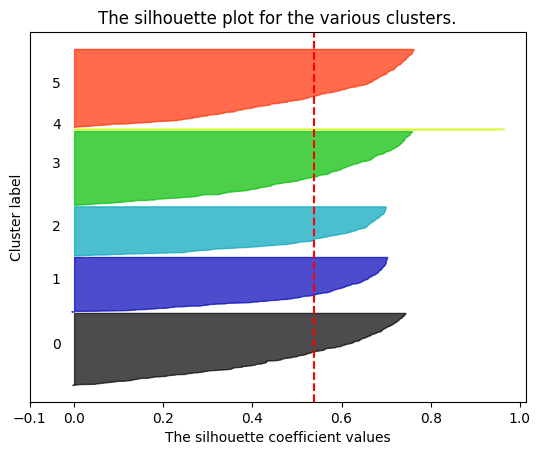

In [39]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
import numpy as np


silhouette_values = silhouette_samples(X_data, kmeans_labels)

fig, ax = plt.subplots(1, 1)
y_lower = 10
for i in range(kmeans.n_clusters):
    ith_cluster_silhouette_values = silhouette_values[kmeans_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / kmeans.n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

ax.set_title("The silhouette plot for the various clusters.")
ax.set_xlabel("The silhouette coefficient values")
ax.set_ylabel("Cluster label")

ax.axvline(x=silhouette_score, color="red", linestyle="--")

ax.set_yticks([])
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()